In [1]:
#Import Libraries

import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime 
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, accuracy_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings

In [2]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')
#create submision file
submit = pd.DataFrame(columns = ['ID', 'Response'])
submit.ID = test.ID
#submit.head()

In [3]:
train.drop('ID', axis = 1,inplace=True)
test.drop('ID', axis = 1,inplace=True)

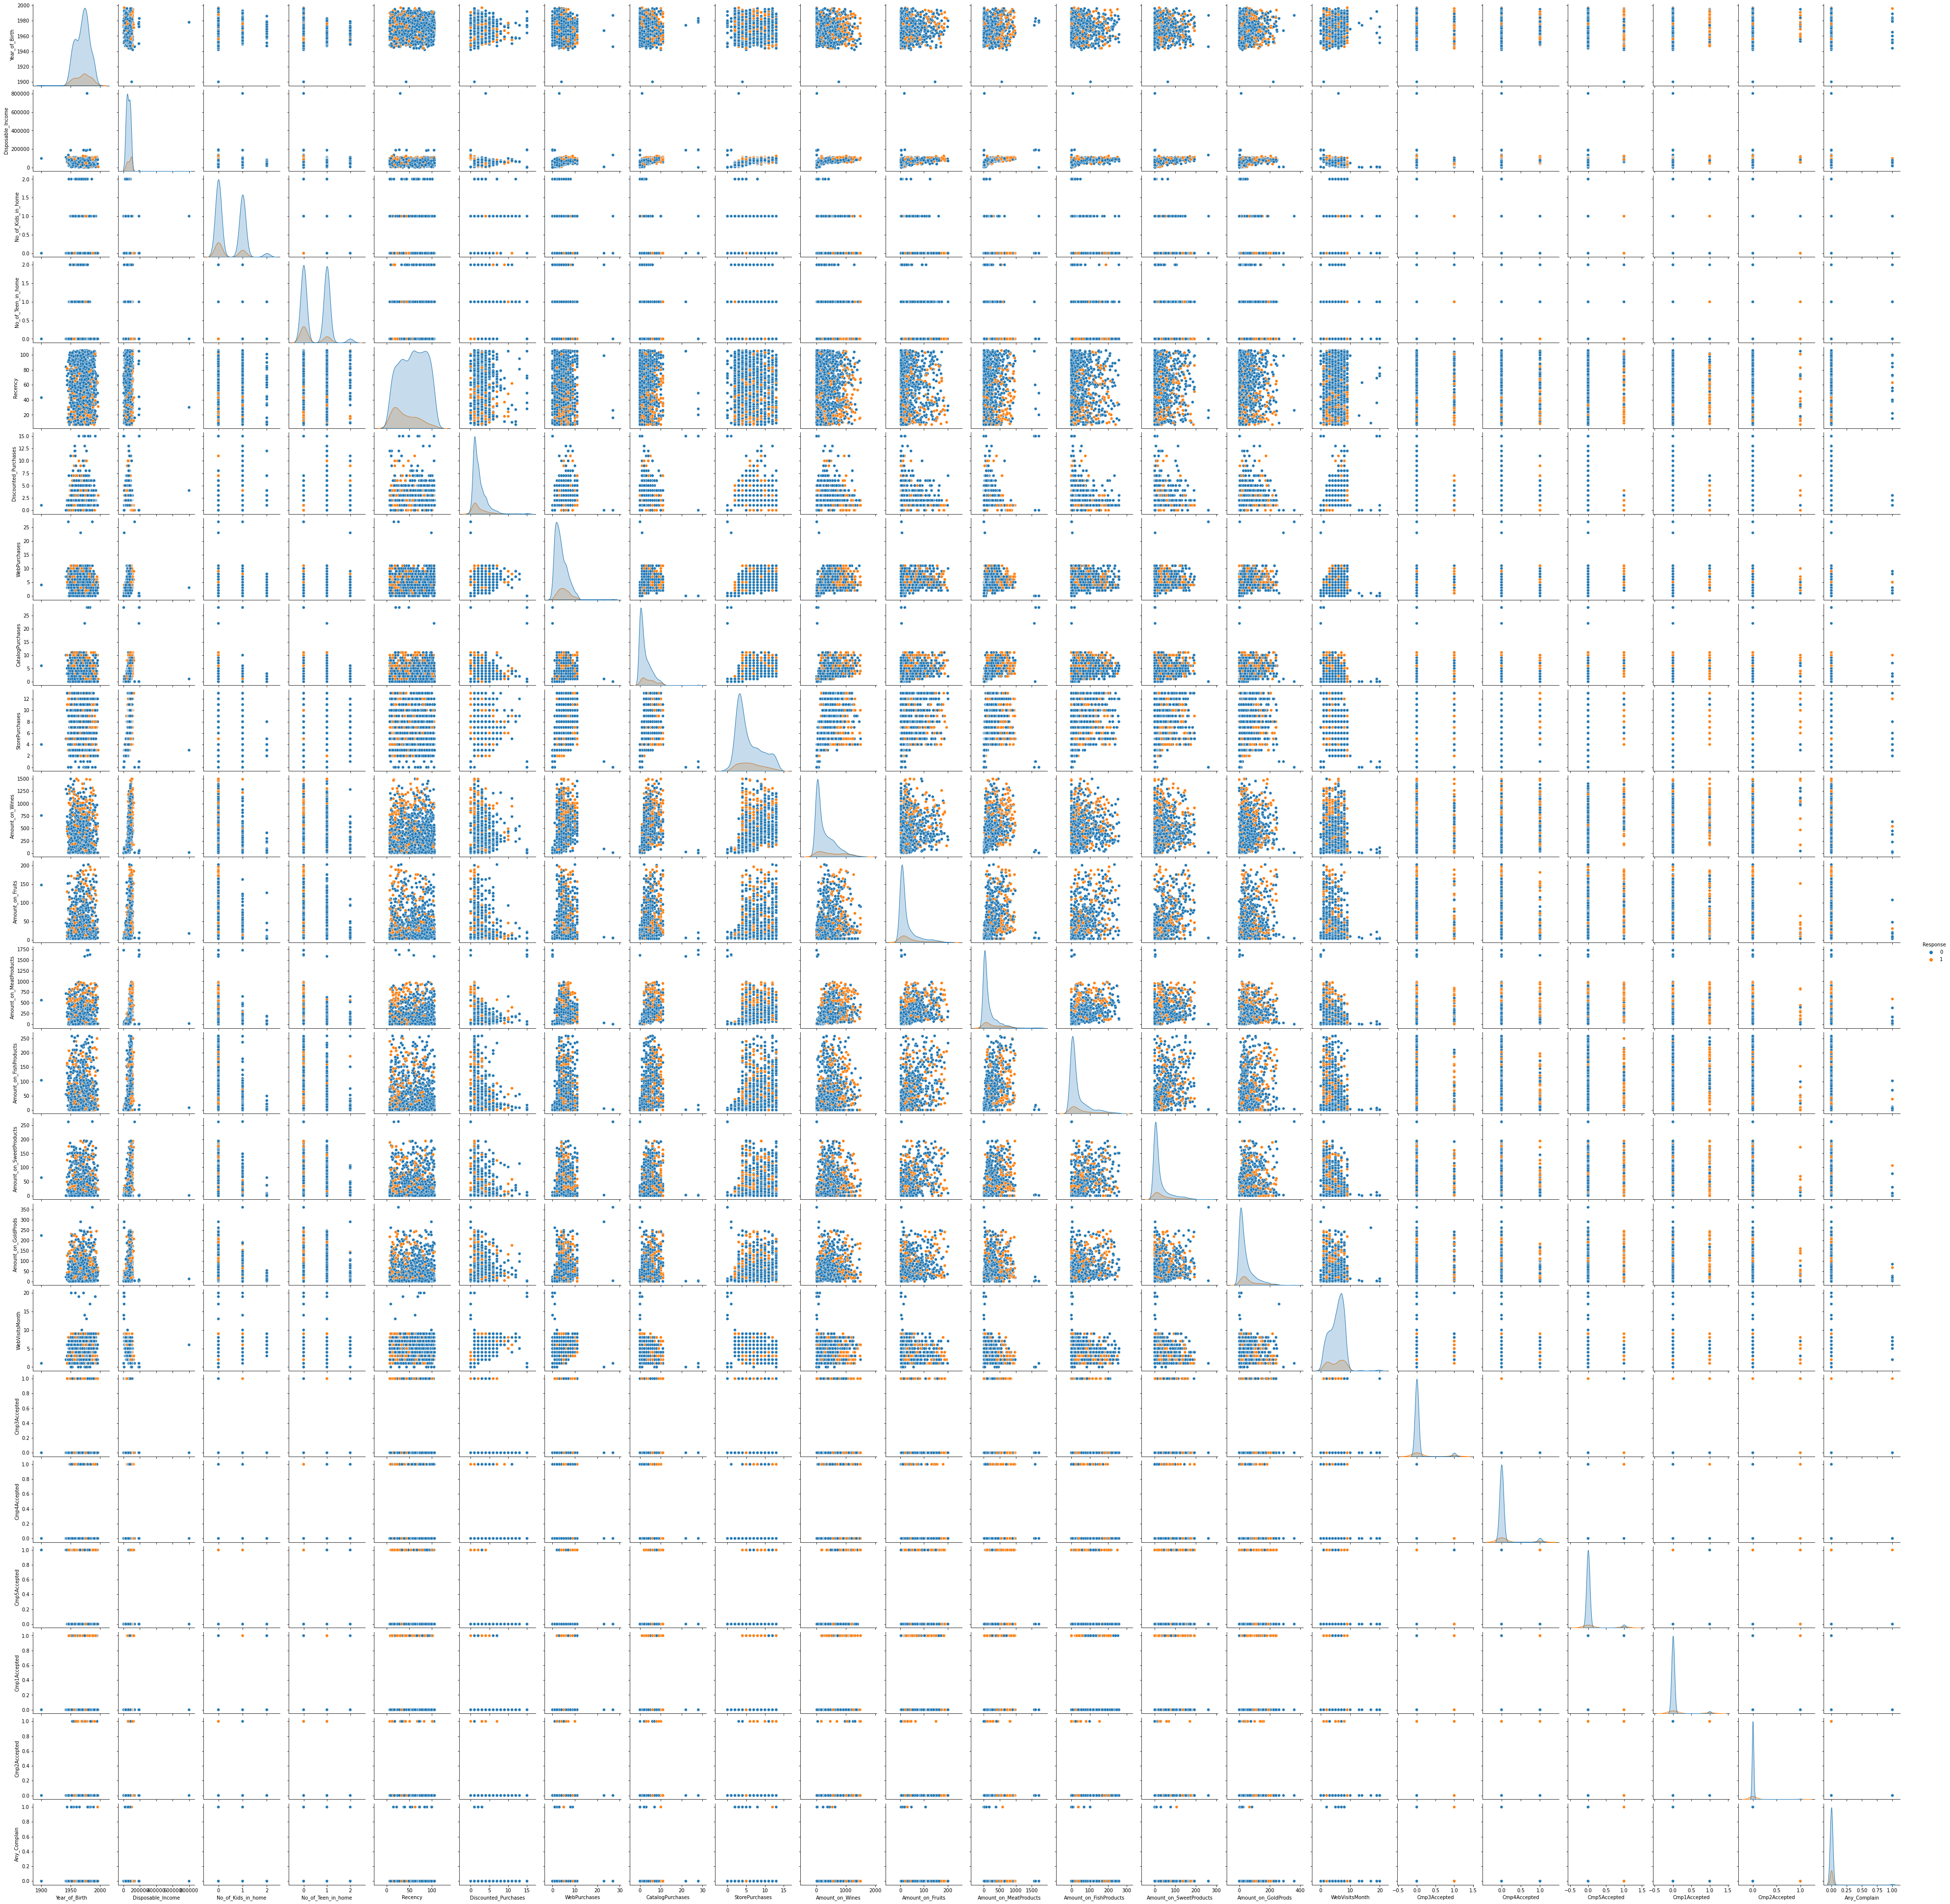

In [14]:
#let's look at all the variables now
sns.pairplot(train, hue = 'Response')

In [4]:
train.Date_Customer = pd.to_datetime(train['Date_Customer'])
test.Date_Customer = pd.to_datetime(test['Date_Customer'])

In [5]:
#let's  sepparate the columns by type
cat_cols = train.select_dtypes(include=['object','category']).columns

num_cols = [col for col in train.columns if col not in cat_cols]

#num_cols

In [6]:
#Fill missing values. Let's fill with mean 
train.Disposable_Income.fillna((train.Disposable_Income.mean()), inplace = True)
#train.isnull().sum()
test.Disposable_Income.fillna((test.Disposable_Income.mean()), inplace = True)
#test.isnull().sum()

In [7]:
#let\s encode the categorical variable. 
#We'll use label encoding because the unique values in the test andtrain dataset aren't the same

label_encode = LabelEncoder()
for i in cat_cols:
    train[i] =  label_encode.fit_transform(train[i])
    test[i] = label_encode.fit_transform(test[i])
    
#train.head()

<AxesSubplot:>

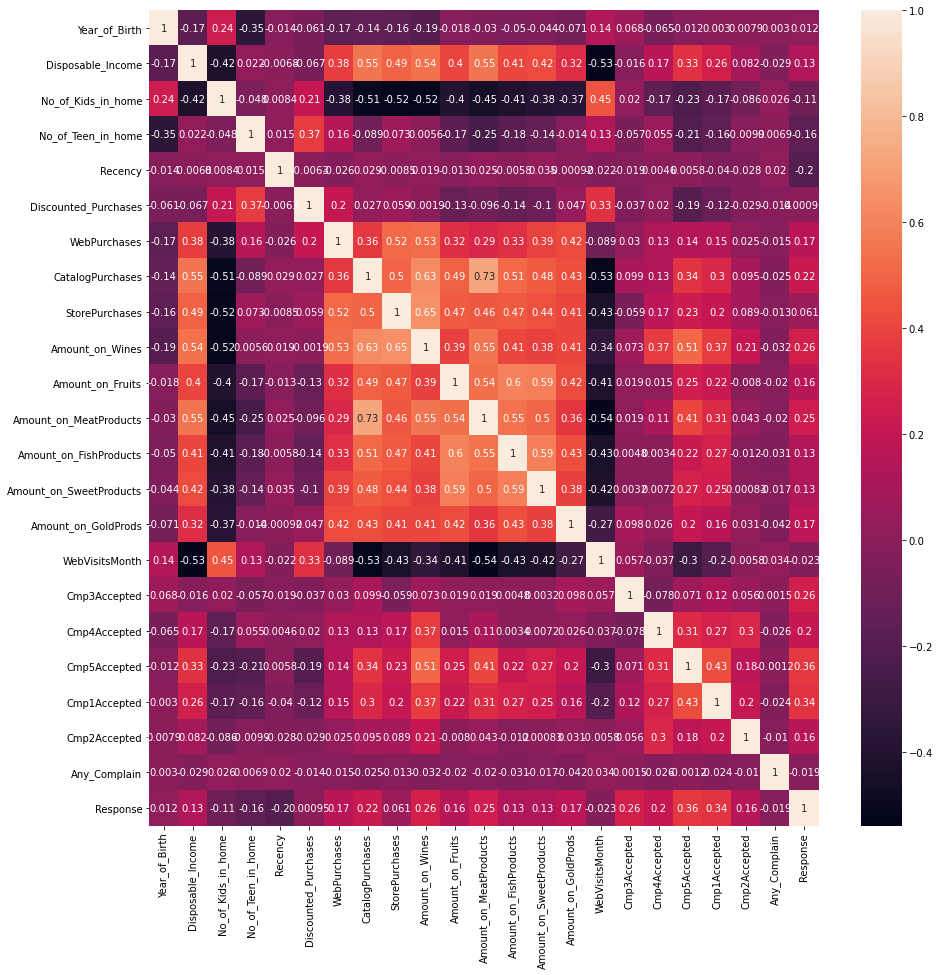

In [16]:
from matplotlib import pyplot
a4_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(train.corr(), annot = True)